In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline

mnist = "./mnist_784.csv"
Names_files = "./Names/*"
PatientData = "./PatientData.csv"

In [168]:
#exercise 1
mean = [-5, 5]
cov = [[20, .8], [.8, 30]]
x,y = np.random.multivariate_normal(mean, cov, 10000).T

(10000,) , (10000,)


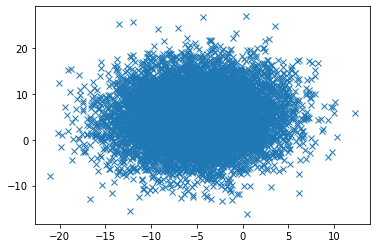

In [15]:
print(str(x.shape) + " , " + str(y.shape))
plt.plot(x, y, 'x') # nice it looks like the multivariate distribution seen in DSP

In [20]:
mean_x = np.sum(x)/len(x)
mean_y = np.sum(y)/len(y)
mean_vector = [mean_x, mean_y]
mean_vector # sweet that's basically what we want [-5, 5]

[-4.9506510969390005, 5.0631109003788355]

In [25]:
var_x = x - mean_x
var_y = y - mean_y
var_matrix = np.array([var_x, var_y])
cov_matrix = np.dot(var_matrix, var_matrix.T.conj())/(len(x)-1)
cov_matrix

array([[19.68465679,  0.91842109],
       [ 0.91842109, 29.97447291]])

In [26]:
np.cov(np.array([x,y])) # great this looks like the last thing

array([[19.68465679,  0.91842109],
       [ 0.91842109, 29.97447291]])

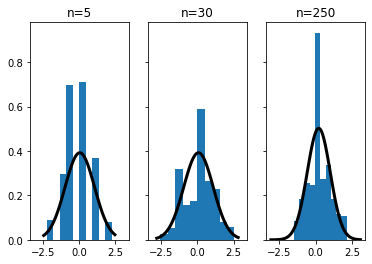

In [170]:
#exercise 2
small_n = 5
medium_n = 30
big_n = 250
sample_size = 1000

# generate random bernoulli with 50% probability [-1,1]
#####
X_i = bernoulli.rvs(0.5, size=sample_size)
X_i = np.where(X_i==0, -1, X_i) 
#####

Zn_small = [np.sum(X_i[i:(i+small_n)%sample_size])/np.sqrt(small_n) for i in range(sample_size)] # get samples Zn
Zn_medium = [np.sum(X_i[i:(i+medium_n)%sample_size])/np.sqrt(medium_n) for i in range(sample_size)] # get samples Zn
Zn_big = [np.sum(X_i[i:(i+big_n)%sample_size])/np.sqrt(big_n) for i in range(sample_size)] # get samples Zn

fig, ax = plt.subplots(1,3, sharex=True, sharey=True)




# plot the density histogram of Zn w/ 5 samples
count_small, bins_small, y = ax[0].hist(Zn_small, density=True)
ax[0].set_title("n=5")
# plot normal curve
#######
mu, std = norm.fit(Zn_small)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[0].plot(x, p, 'k', linewidth=3)
######

# plot the density histogram of Zn w/ 30 samples
count_medium, bins_medium, y = ax[1].hist(Zn_medium, density=True)
ax[1].set_title("n=30")
# plot normal curve
######
mu, std = norm.fit(Zn_medium)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[1].plot(x, p, 'k', linewidth=3)
######

count_big, bins_big, y = ax[2].hist(Zn_big, density=True)
ax[2].set_title("n=250")
# plot the density histogram of Zn w/ 250 samples
######
mu, std = norm.fit(Zn_big)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[2].plot(x, p, 'k', linewidth=3)
######


In [217]:
#exercise 3
patients = pd.read_csv(PatientData)
print(patients.shape) 
#(451,280) -> 451 patients & 280 features

first_features = patients.iloc[:, 0:4] 
display(first_features)
# breakdown:
# first column is index (provided by pandas)
# second column should be something important, could be age but the "13" in row 4 is looking suspicious
# third column is a discrete value, could be gender, seeing/not-seeing, hearing/not-hearing, etc.. can't be sure without feature analysis
# fourth column looks too be height in centimeters.. no major outliers from the summary
# fifth column seems to be weight? Again, the "51" in row 4 looks suspicious,
# but if you compare row 4 to row 449, a 13 year old "boy" could compare to the weight/height of a 32 y.o. woman

(451, 280)


,75,0,190,80
0,56,1,165,64
1,54,0,172,95
2,55,0,175,94
3,75,0,190,80
4,13,0,169,51
...,...,...,...,...
446,53,1,160,70
447,37,0,190,85
448,36,0,166,68
449,32,1,155,55


In [218]:
display(first_features.iloc[4, :])
display(first_features.iloc[449, :])

75      13
0        0
190    169
80      51
Name: 4, dtype: int64

75      32
0        1
190    155
80      55
Name: 449, dtype: int64

In [223]:
# Are there missing values?
print(np.nan in patients) # False, so they aren't stored as NaNs
print('x' in patients) # False, not x's
display(patients.iloc[:,:15]) # there is a column of '?'
print('?' in patients) # True - assuming these are the missing values
patients.replace('?', np.nan, inplace=True)
patients = patients.astype(float)
patients.fillna(patients.mean(), inplace=True) 
display(patients.iloc[:,:15])

False
False


,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63
0,56,1,165,64,81,174,401,149,39,25,37,-17,31,NaN,53
1,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
2,55,0,175,94,100,202,380,179,143,28,11,-5,20,NaN,71
3,75,0,190,80,88,181,360,177,103,-16,13,61,3,NaN,NaN
4,13,0,169,51,100,167,321,174,91,107,66,52,88,NaN,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,4,40,-27,NaN,63
447,37,0,190,85,100,137,361,201,73,86,66,52,79,NaN,73
448,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84
449,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80


True


,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63
0,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,37.0,-17.0,31.0,-13.592105,53.000000
1,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,34.0,70.0,66.0,23.000000,75.000000
2,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,11.0,-5.0,20.0,-13.592105,71.000000
3,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,13.0,61.0,3.0,-13.592105,74.488889
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,66.0,52.0,88.0,-13.592105,84.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,4.0,40.0,-27.0,-13.592105,63.000000
447,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,66.0,52.0,79.0,-13.592105,73.000000
448,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,-19.0,-61.0,-70.0,84.000000,84.000000
449,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,29.0,-22.0,43.0,103.000000,80.000000


,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
75,1.000000,-0.055041,-0.112350,0.380295,-0.004568,0.038057,0.195911,0.025302,0.095607,-0.262884,...,0.163452,-0.158486,0.081584,0.091024,NaN,-0.042343,-0.277385,0.016968,-0.204824,-0.096395
0,-0.055041,1.000000,-0.123334,-0.246827,-0.337234,-0.044792,0.072431,-0.184710,-0.078332,0.066926,...,0.232570,-0.042730,0.093699,0.027243,NaN,0.016981,0.068776,0.032459,0.049385,-0.176193
190,-0.112350,-0.123334,1.000000,-0.076050,-0.006525,0.012415,-0.237587,-0.038591,0.027373,0.063209,...,-0.019615,-0.073452,-0.091807,-0.002433,NaN,0.066213,-0.010166,-0.090840,-0.093933,0.005325
80,0.380295,-0.246827,-0.076050,1.000000,0.099938,0.118650,0.118545,0.149894,0.119024,-0.171948,...,0.049708,-0.026920,0.051539,0.047601,NaN,-0.048127,-0.146893,0.061859,-0.052486,-0.091773
91,-0.004568,-0.337234,-0.006525,0.099938,1.000000,0.021595,0.218655,0.397415,0.049401,-0.145911,...,-0.199156,0.091390,-0.228796,-0.013673,NaN,-0.066021,-0.222871,0.129723,-0.083224,0.323919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.9.3,-0.042343,0.016981,0.066213,-0.048127,-0.066021,0.141499,-0.035300,0.048962,0.245865,0.084931,...,-0.086841,-0.007990,-0.092889,-0.019777,NaN,1.000000,-0.046339,-0.070680,-0.067003,-0.088937
2.9.1,-0.277385,0.068776,-0.010166,-0.146893,-0.222871,0.059091,-0.039241,-0.185431,0.012957,0.066348,...,0.115842,0.093930,-0.073254,-0.017510,NaN,-0.046339,1.000000,-0.124978,0.687003,-0.033325
23.3,0.016968,0.032459,-0.090840,0.061859,0.129723,-0.028268,0.256154,0.130142,-0.017179,0.298921,...,0.002299,0.671457,0.562745,-0.051085,NaN,-0.070680,-0.124978,1.000000,0.611363,0.002868
49.4,-0.204824,0.049385,-0.093933,-0.052486,-0.083224,0.019067,0.150904,-0.014721,0.001413,0.258498,...,0.081450,0.561131,0.341288,-0.049541,NaN,-0.067003,0.687003,0.611363,1.000000,-0.011539


75      -0.022651
0       -0.018982
190      0.017586
80       0.002338
91       0.055933
           ...   
0.9.3    0.008868
2.9.1    0.023051
23.3     0.047668
49.4     0.051764
8        0.023707
Length: 280, dtype: float64

Max average correlation for column (features) in patients data: 0.058421017315845446
Min average correlation for column (features) in patients data: -0.04645664113582559


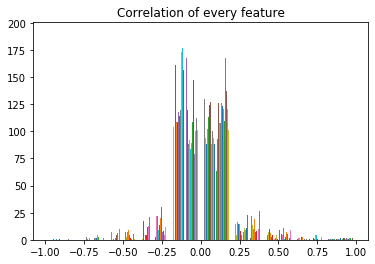

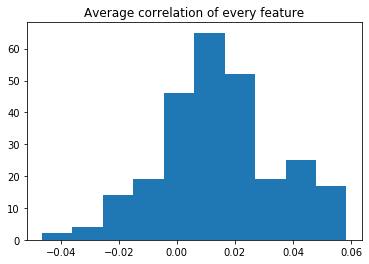

In [271]:
# find the features highly related to patient's condition
# first get the correlation matrix
patients_correlation_matrix = patients.corr()
display(patients_correlation_matrix) # don't like how this is coming out
mean_patients_correlation_matrix = patients_correlation_matrix.mean()
display(mean_patients_correlation_matrix) 
print("Max average correlation for column (features) in patients data: " + str(mean_patients_correlation_matrix.max()))
print("Min average correlation for column (features) in patients data: " + str(mean_patients_correlation_matrix.min()))

_ = plt.hist(patients_correlation_matrix)
plt.title("Correlation of every feature")
plt.show()

_ = plt.hist(mean_patients_correlation_matrix) # no column averages higher than 0.06 correlation
plt.title("Average correlation of every feature")
plt.show()

# so it seems the relationship between condition and patient features is not completely standard between patients
# that's expected but it's good to see

In [309]:
# define strong featurees to be those over 0.75 or less than -0.75 => looks to be at edges of (normal) curve
strong_features = [i for i, corr in enumerate(patients_correlation_matrix.iloc[len(patients_correlation_matrix)-1]) if corr >= 0.75 or corr <= -0.75]
print(strong_features)

[279]
